In [1]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

Input bounds:

In [2]:
m = 0
eps = 2

In [3]:
l = m - eps
u = m + eps

In [4]:
x = np.linspace(l, u, 1001)
x

array([-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ])

Constant bounds:

In [5]:
#y_l = expit(l)
#y_u = expit(u)
# let x = x_2 - x_1, y = expit(-x) to be in line with AISTATS paper
y_l = expit(-u)
y_u = expit(-l)
(y_l, y_u)

(0.11920292202211755, 0.8807970779778823)

In [6]:
log_y_l = np.log(y_l)
log_y_u = np.log(y_u)
(log_y_l, log_y_u)

(-2.1269280110429727, -0.12692801104297263)

Softmax itself:

In [7]:
y = expit(-x)
y

array([0.88079708, 0.88037646, 0.87995457, ..., 0.12004543, 0.11962354,
       0.11920292])

Nonlinear lower bounds:

In [8]:
#ERl = 1 / ((u - x) / (u - l) / y_l + (x - l) / (u - l) / y_u)
ERl = 1 / ((u - x) / (u - l) / y_u + (x - l) / (u - l) / y_l)
ERl

array([0.88079708, 0.87520534, 0.86968416, ..., 0.11940942, 0.11930608,
       0.11920292])

In [9]:
#LSEl = y_l**((u - x) / (u - l)) * y_u**((x - l) / (u - l))
LSEl = y_u**((u - x) / (u - l)) * y_l**((x - l) / (u - l))
LSEl

array([0.88079708, 0.87903724, 0.87728093, ..., 0.11968069, 0.11944157,
       0.11920292])

Nonlinear upper bounds:

In [10]:
ERu = y_l + y_u - y_l * y_u / y
ERu

array([0.88079708, 0.88074013, 0.88068295, ..., 0.12538459, 0.12229994,
       0.11920292])

In [11]:
LSEu = (y_l * log_y_u - y_u * log_y_l + (y_u - y_l) * np.log(y)) / (log_y_u - log_y_l)
LSEu

array([0.88079708, 0.88061519, 0.88043266, ..., 0.12188488, 0.12054422,
       0.11920292])

Bounds on complementary softmax function --- SKIP

In [13]:
ym_l = expit(-l)
ym_u = expit(-u)
(ym_l, ym_u)

(0.8807970779778823, 0.11920292202211755)

In [14]:
log_ym_l = np.log(ym_l)
log_ym_u = np.log(ym_u)
(log_ym_l, log_ym_u)

(-0.12692801104297263, -2.1269280110429727)

In [14]:
LSEml = ym_l**((u - x) / (u - l)) * ym_u**((x - l) / (u - l))
1 - LSEml

array([0.26894142, 0.27093837, 0.27292987, ..., 0.95231397, 0.95244422,
       0.95257413])

In [15]:
ym = expit(-x)
ym

array([0.73105858, 0.7302714 , 0.72948278, ..., 0.0477886 , 0.04760691,
       0.04742587])

In [16]:
LSEmu = (ym_l * log_ym_u - ym_u * log_ym_l + (ym_u - ym_l) * np.log(ym)) / (log_ym_u - log_ym_l)
1 - LSEmu

array([0.26894142, 0.26921068, 0.26948072, ..., 0.95066989, 0.95162192,
       0.95257413])

In [17]:
linl = y_l + y_l * (1 - y_l) * (x - l)
linl

array([0.26894142, 0.26972787, 0.27051432, ..., 1.05381626, 1.05460271,
       1.05538915])

In [18]:
linu = y_u + y_u * (1 - y_u) * (x - u)
linu

array([0.77186749, 0.77204819, 0.7722289 , ..., 0.95221271, 0.95239342,
       0.95257413])

Linear bounds of Shi et al. (ICLR 2020) and Bonaert et al. (PLDI 2021)

In [12]:
#t = min(np.log((np.exp(-l) - np.exp(-u)) / (u - l)), 1 - u)
t = min(np.log((np.exp(u) - np.exp(l)) / (u - l)), 1 + l)
t

-1

In [13]:
np.log((np.exp(u) - np.exp(l)) / (u - l))

0.5952201920542229

In [14]:
#L = 1 + np.exp(t) * (1 - u - t)
#U = 1 + np.exp(-l)
L = 1 + np.exp(t) * (1 + l - t)
U = 1 + np.exp(u)
T = max(np.sqrt(L * U), U / 2)
L, U, T

(1.0, 8.38905609893065, 4.194528049465325)

In [15]:
#linl = 1 / T * (2 - 1 / T * (1 + (x - l) / (u - l) * np.exp(-u) + (u - x) / (u - l) * np.exp(-l)))
linl = 1 / T * (2 - 1 / T * (1 + (x - l) / (u - l) * np.exp(u) + (u - x) / (u - l) * np.exp(l)))
linl

array([4.12282243e-01, 4.11869961e-01, 4.11457679e-01, ...,
       8.24564486e-04, 4.12282243e-04, 5.29367315e-17])

In [16]:
#linu = 1 / L + 1 / U - 1 / (L * U) * (1 + np.exp(t) * (1 - x - t))
linu = 1 / L + 1 / U - 1 / (L * U) * (1 + np.exp(t) * (1 + x - t))
linu

array([1.        , 0.99982459, 0.99964918, ..., 0.8249416 , 0.82476619,
       0.82459078])

Plot:

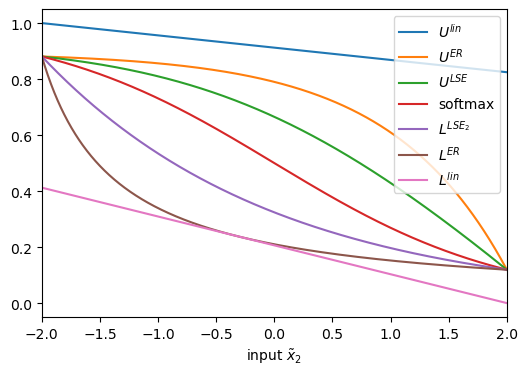

In [18]:
plt.figure(figsize=(6., 4.))
plt.plot(x, linu)
plt.plot(x, ERu)
plt.plot(x, LSEu)
plt.plot(x, y)
plt.plot(x, LSEl)
plt.plot(x, ERl)
plt.plot(x, linl)
#plt.plot(x, 1 - LSEml)
#plt.plot(x, 1 - LSEmu)
#if l < 0:
#if u > 0:
#plt.legend(['true', 'ERl', 'LSEl', 'ERu', 'LSEu', 'LSEcl', 'LSEcu'])
plt.xlim([l, u])
plt.xlabel(r'input $\tilde{x}_2$')
plt.legend(['$U^{lin}$', '$U^{ER}$', '$U^{LSE}$', 'softmax', '$L^{LSE_2}$', '$L^{ER}$', '$L^{lin}$'])
plt.savefig('figures/logistic_bounds_aistats.pdf', bbox_inches='tight')

## Scratch

In [24]:
l = -1
u = -0

In [26]:
x_max = np.log((np.log(1 + np.exp(u)) - np.log(1 + np.exp(l))) / (np.log(1 + np.exp(-l)) - np.log(1 + np.exp(-u))))
x_max

-0.49003427641921443

In [27]:
(u - x_max) / (u - l) * np.log(1 + np.exp(l)) + (x_max - l) / (u - l) * np.log(1 + np.exp(u)) - np.log(1 + np.exp(x_max))

0.029139138501623862

In [28]:
(np.log(1 + np.exp(u)) - np.log(1 + np.exp(l))) / (u - l)

0.3798854930417224

In [29]:
(u * np.log(1 + np.exp(l)) - l * np.log(1 + np.exp(u))) / (u - l)

0.6931471805599453